Helper functions

In [27]:
"""
This function is used to create a permutation of the vertices of an n-sided polygon induced by rotations and reflections. 
Inputs:
    n (int) is the number of polygon vertices
    start (int) is the starting value of the dictionary
    ref (bool) is True if the permutation is induced by a reflection. False otherwise
    
Output: 
    R is the dictionary representing a permutation of n vertices begining with start
"""
def Rn(n,start,ref):
    R = {}
    key = 1
    val = start
    for i in range(n):
        R[key] = val     
        key += 1     
        if ref:   
            val -= 1
        else: 
            val += 1
        val = val%n
        if val == 0:  # n mod n is 0, val = 0. But we want val = n
            val = n
    return R

In [28]:
"""
This function composes two permutation elements of a given n-sided polygon
Input: 
    Rs, Rt (dictonary) are the two permutation elements to be composted
    dictofElem (dictionary) contains all permutation elements of an n-sided polygon
Output:
    k (dictionary) is the resulting composition of Rs with Rt. It is a single permutation element in dictofElem
"""

def composition(Rs, Rt, dictofElem):
    dict = {} 
    for k, v in Rt.items():
        dict[k] = Rs[v]      #set the value of dict with key K equal to the the value in Rs with key V
        
    for k, v in dictofElem.items():
        if dict == dictofElem[k]:   #find which element of in dictofElem corresponds with the newly created dict
            return k                #note: k is a string
    return 

In [29]:
"""
This function creates the composition table for all the permutation elements of an n-sided polygon
Input:
    a dictionary of all the permutation elements of a given n-sided polygon
Outupt: 
    two data frames, one with string elements and the other with integer elements
"""
import pandas as pd

def compTable(dictofElem):
    df = {} #<---- dataframe of all the compositions of Rs*Rt
    df_int = {} #<---- dataframe of compositions, but converted to integers to create heatmap
    i = 0 
    for V in dictofElem.values():           #compose every element in dictofElem with every element in dictofElem
        for v in dictofElem.values():
            x = composition(v,V,dictofElem)
            if i in df:                                     
                df[i] += [x]                
                df_int[i] += [int(x[1:])]

            else:
                df[i] = [x]
                df_int[i] = [int(x[1:])]        
        i += 1

    df = pd.DataFrame(df)
    df_int = pd.DataFrame(df_int)
    return df, df_int

## The hexagon

In [30]:
R0 = Rn(6,1,False) #identity element 
R1 = Rn(6,2,False); R2 = Rn(6,3,False); R3 = Rn(6,4,False); R4 = Rn(6,5,False); R5 = Rn(6,6,False) #rotations
R6 = Rn(6,6,True); R7 = Rn(6,1,True); R8 = Rn(6,2,True); R9 = Rn(6,3,True); R10 = Rn(6,4,True); R11 = Rn(6,5,True) #reflections
dictofHex = {'R0': R0, 'R1': R1, 'R2': R2, 'R3': R3, 'R4': R4, 'R5': R5, 'R6': R6, 'R7': R7, 'R8': R8, 'R9': R9, 'R10': R10, 'R11': R11}

In [31]:
compTable(dictofHex)[0]

,0,1,2,3,4,5,6,7,8,9,10,11
0,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11
1,R1,R2,R3,R4,R5,R0,R7,R8,R9,R10,R11,R6
2,R2,R3,R4,R5,R0,R1,R8,R9,R10,R11,R6,R7
3,R3,R4,R5,R0,R1,R2,R9,R10,R11,R6,R7,R8
4,R4,R5,R0,R1,R2,R3,R10,R11,R6,R7,R8,R9
5,R5,R0,R1,R2,R3,R4,R11,R6,R7,R8,R9,R10
6,R6,R11,R10,R9,R8,R7,R0,R5,R4,R3,R2,R1
7,R7,R6,R11,R10,R9,R8,R1,R0,R5,R4,R3,R2
8,R8,R7,R6,R11,R10,R9,R2,R1,R0,R5,R4,R3
9,R9,R8,R7,R6,R11,R10,R3,R2,R1,R0,R5,R4


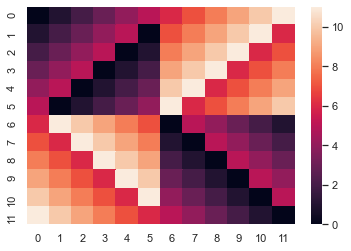

In [32]:
import seaborn as sns; sns.set_theme()
x = compTable(dictofHex)[1]
ax = sns.heatmap(x)

## The Square 

In [41]:
R0 = Rn(4,1,False) #identity element 
R1 = Rn(4,2,False); R2 = Rn(4,3,False); R3 = Rn(4,4,False) #rotations
R4 = Rn(4,2,True); R5 = Rn(4,3,True); R6 = Rn(4,4,True); R7 = Rn(4,1,True) #reflections
dictofSquare = {'R0': R0, 'R1': R1, 'R2': R2, 'R3': R3, 'R4': R4, 'R5': R5, 'R6': R6, 'R7': R7}

In [43]:
compTable(dictofSquare)[0]

,0,1,2,3,4,5,6,7
0,R0,R1,R2,R3,R4,R5,R6,R7
1,R1,R2,R3,R0,R5,R6,R7,R4
2,R2,R3,R0,R1,R6,R7,R4,R5
3,R3,R0,R1,R2,R7,R4,R5,R6
4,R4,R7,R6,R5,R0,R3,R2,R1
5,R5,R4,R7,R6,R1,R0,R3,R2
6,R6,R5,R4,R7,R2,R1,R0,R3
7,R7,R6,R5,R4,R3,R2,R1,R0


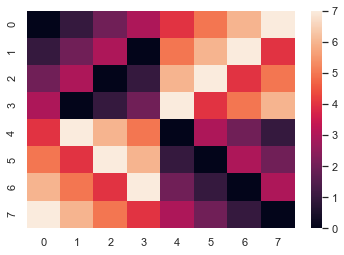

In [44]:
import seaborn as sns; sns.set_theme()
x = compTable(dictofSquare)[1]
ax = sns.heatmap(x)

## The Rectangular Hex

In [45]:
R0 = Rn(6,1,False) #identity element 
R1 = Rn(6,4,False) #rotation
R2 = Rn(6,3,True); R3 = Rn(6,6,True) #reflections
dictofRHex = {'R0': R0, 'R1': R1, 'R2': R2, 'R3': R3}

In [46]:
compTable(dictofRHex)[0] #group table under composition of permutations

,0,1,2,3
0,R0,R1,R2,R3
1,R1,R0,R3,R2
2,R2,R3,R0,R1
3,R3,R2,R1,R0


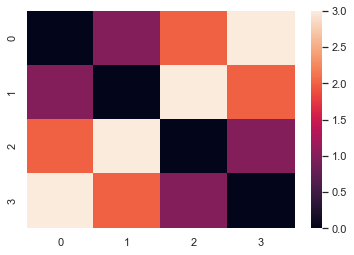

In [47]:
import seaborn as sns; sns.set_theme()
x = compTable(dictofRHex)[1]
ax = sns.heatmap(x)

## The Rectangle 

In [48]:
R0 = Rn(4,1,False) #identity element 
R1 = Rn(4,1,True); R2 = Rn(4,3,True) #reflections
R3 = Rn(4,3,False) #rotation
dictofRect = {'R0': R0, 'R1': R1, 'R2': R2, 'R3': R3}

In [49]:
compTable(dictofRect)[0]

,0,1,2,3
0,R0,R1,R2,R3
1,R1,R0,R3,R2
2,R2,R3,R0,R1
3,R3,R2,R1,R0


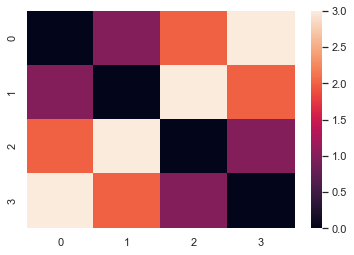

In [50]:
import seaborn as sns; sns.set_theme()
x = compTable(dictofRect)[1]
ax = sns.heatmap(x)